# Mulitple Linear Regression
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Importing Libraries:
- Numpy
- Pandas
- Matplotlib
- Seaborn
- SciKit learn
- Stats models

In [17]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn and required packages from it
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Import statsmodels and required packages from it
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Understanding the Data

In [18]:
# Reading the data
df = pd.read_csv('day.csv')

In [19]:
# Dataframe using head command
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# Checking the size of the bike dataframe
df.shape

(730, 16)

- Dataframe has 730 rows and 16 columns

In [21]:
# Checking for detailed info about the dataset,Null counts,datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [22]:
# Checking for missing values
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- There are no Null values/Missing values in any of the Columns

In [23]:
# Checking central tendency,distribution of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [24]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Cleaning and Manipulation

### Dropping columns that are not useful
- dteday:remaining features of date are alreaady present(Weekday,mnth,yr).
- instant:holds no significance for analysis.
- casual and registered: cnt is sum of these 2 columns.

In [25]:
# Dropping dteday,instant,casual,registered columns
df.drop(['dteday','instant','casual','registered'], axis=1, inplace=True)

In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Checking outliers
- Check for count of unique values and find the outliers by plotting boxplot

In [27]:
# Checking the count of unique values of the columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

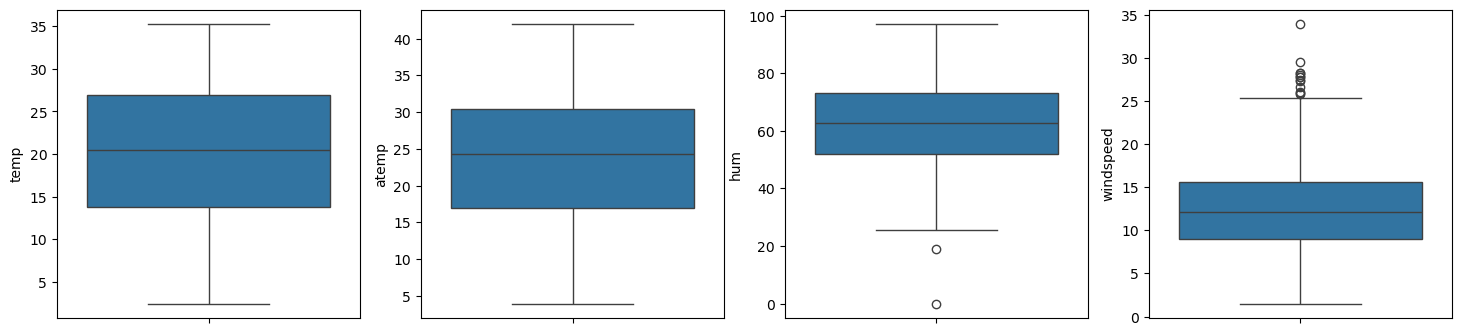

In [28]:
# Checking for outliers in temp, atemp, hum, windspeed
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
sns.boxplot(y='temp', data=df)

plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=df)

plt.subplot(1,4,3)
sns.boxplot(y='hum', data=df)

plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=df)

plt.show()

- Not much outliers are present in temp, atemp, hum, windspeed

### Data Manipulation: Replacing below columns with meaningful data for categorical coulmns
- season
- mnth
- weekday
- weathersit

In [29]:
# season (1:spring, 2:summer, 3:fall, 4:winter)
df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

# mnth (1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec')
df['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)

# weekday (0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat')
df['weekday'].replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}, inplace = True)

# weathersit (1:'clear', 2:'cloudy', 3:'drizzle', 4:'rainy')
df['weathersit'].replace({1:'clear', 2:'mist', 3:'drizzle', 4:'rainy'}, inplace = True)

In [30]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Understanding and Visualising the data
- Pairwise correlation for linear relationship
- Heatmap to understand the correlation between numerical features

In [31]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1000x600 with 0 Axes>

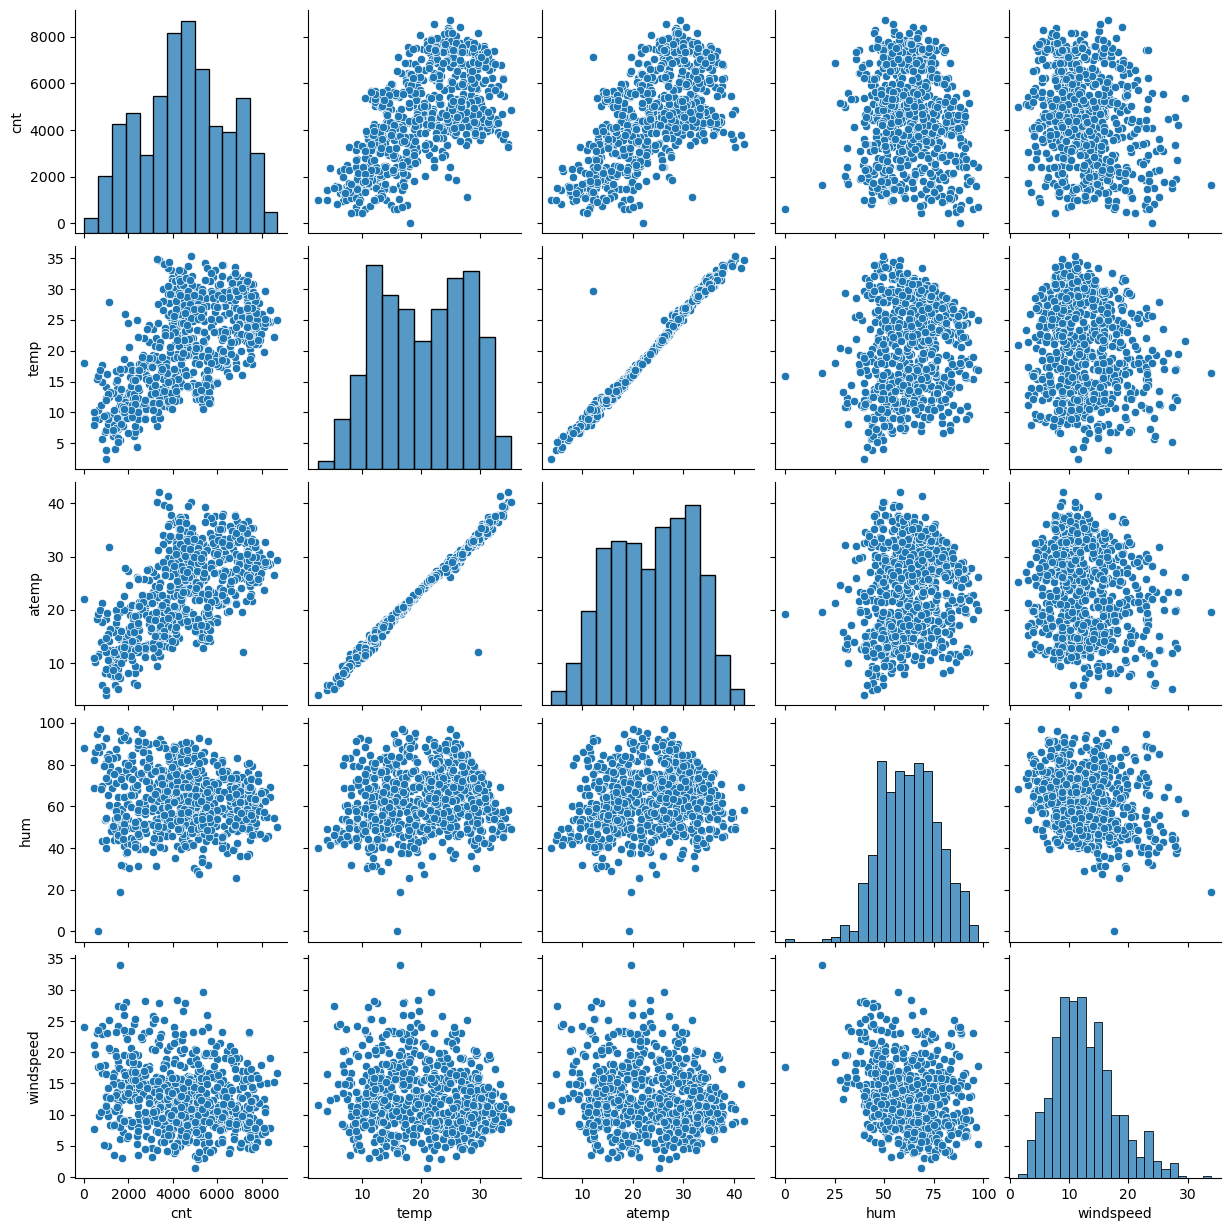

In [32]:
# Visualising Numeric Variables
plt.figure(figsize = (10,6))
sns.pairplot(df[['cnt', 'temp', 'atemp', 'hum','windspeed']])
plt.show()

- We can see clear linear relation between cnt vs temp and atemp

#### Visualising Categorical Variables
- Draw boxplot of categorical variables.

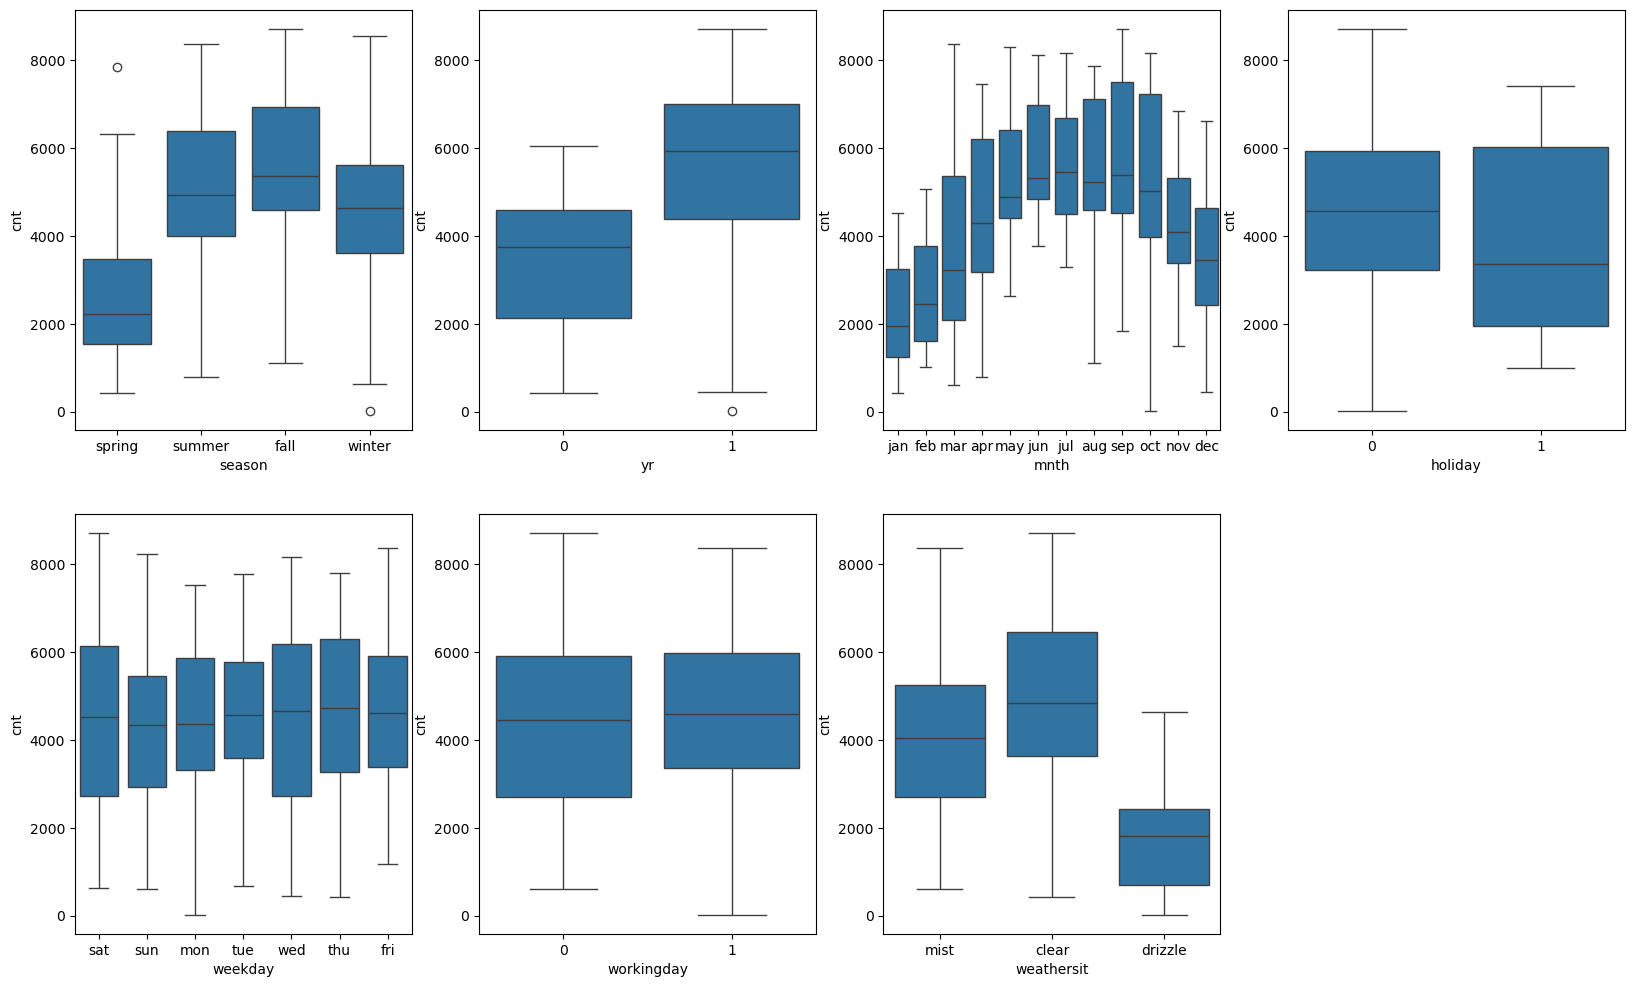

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

Below are the observations of the above boxplots,

1. bikes are taken more on Fall season compare to other seasons and low in Spring season
2. more bikes are taken in  2019 compare to 2018
3. Between June to October have high demand to bike sharing
4. Similar For both working day and non-working day
5. For all weekdays, rental bikes have same median value
6. During clear day we can see more demand, Less in Drizzle and zero in Heavy rain

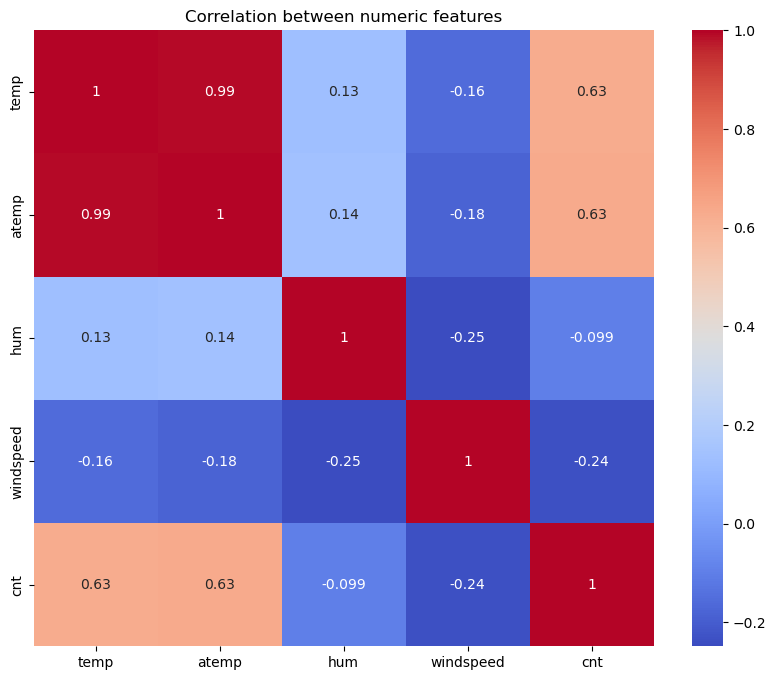

In [34]:
#Plotting heatmap with correlation among numeric variables
plt.figure(figsize=(10,8))
plt.title("Correlation between numeric features")
sns.heatmap(df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), cmap="coolwarm",annot= True)
plt.show()

### Preparing data for modelling
- Convert columns with binary values to 0/1 - columns with binary critera are already in binary format.
- Converting the categorical variables to dummy variables
- Train and Test split (70:30)

In [35]:
# Get the dummy variables for the features 'season', 'mnth', 'weekday', 'weathersit'
df = pd.get_dummies(data=df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True, dtype=int)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_drizzle,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# Checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   season_spring       730 non-null    int32  
 9   season_summer       730 non-null    int32  
 10  season_winter       730 non-null    int32  
 11  mnth_aug            730 non-null    int32  
 12  mnth_dec            730 non-null    int32  
 13  mnth_feb            730 non-null    int32  
 14  mnth_jan            730 non-null    int32  
 15  mnth_jul            730 non-null    int32  
 16  mnth_jun

In [37]:
# Splitting Train and Test data (70:30)
np.random.seed(0)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [38]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(511, 30)
(219, 30)


In [39]:
#Printing the stats of the training dataset
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_drizzle,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,20.106483,23.499390,63.109443,12.833686,4491.303327,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,7.424445,8.083052,14.142965,5.286912,1953.413860,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.649576,16.634475,52.291650,9.041918,3123.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.260847,24.115200,63.416700,12.124789,4539.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.208350,15.750595,6008.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train model based on Train data
- Features scaling of the Train data: MinMaxScaling
- Plot heatmap
- Dividing into X and y sets for the model building
- Add constants
- Build model using RFE
- Repeat building the model till the p-value, VIF, right R2 score are in place

In [40]:
# Scaling of the Train data: MinMaxScaling
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] = scaler.fit_transform(df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_drizzle,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [43]:
# Printing stats after applying the scaling on the train dataset
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_drizzle,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186,0.242661,0.246575,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737,0.429112,0.431440,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


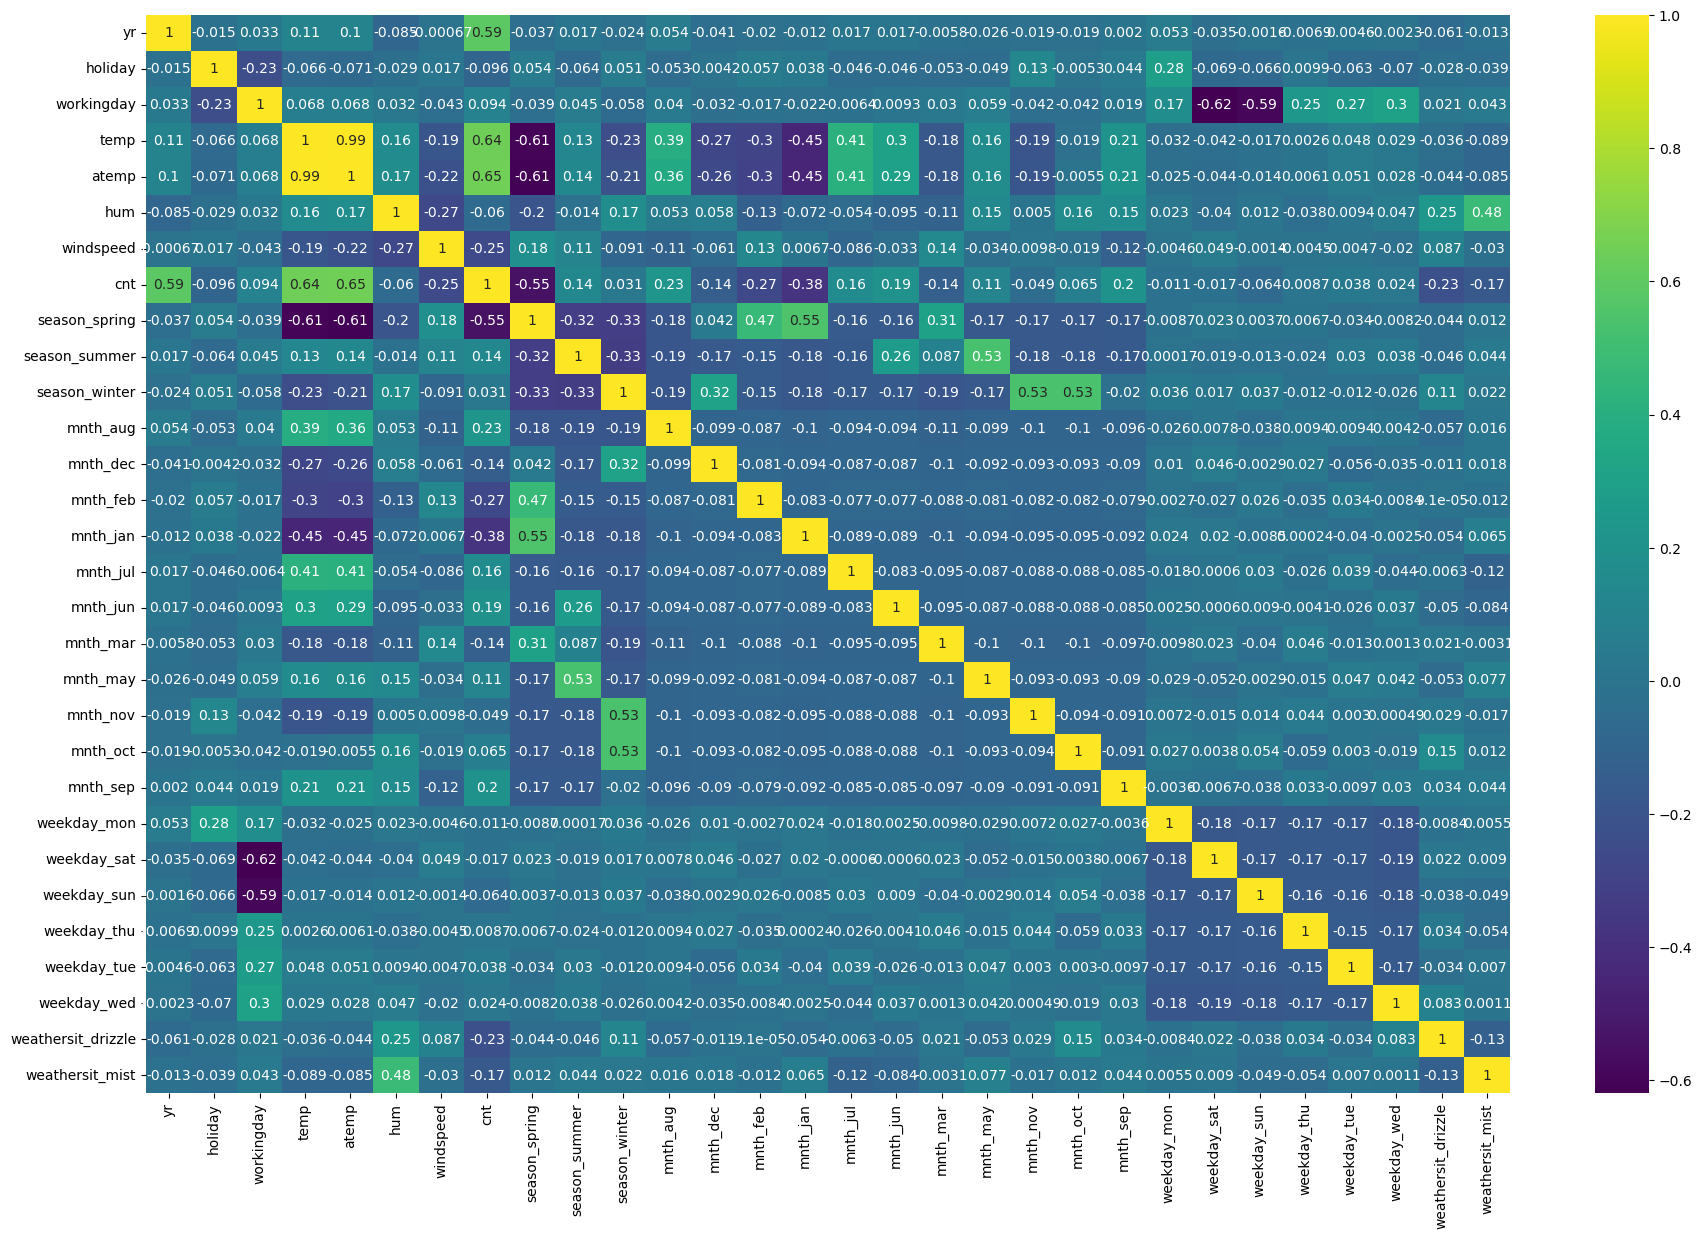

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (22 ,14))
sns.heatmap(df_train.corr(), annot = True, cmap="viridis")
plt.show()

- Noticed that, `yr`, `temp`, `atemp` seems to the correlated to `cnt` the most.

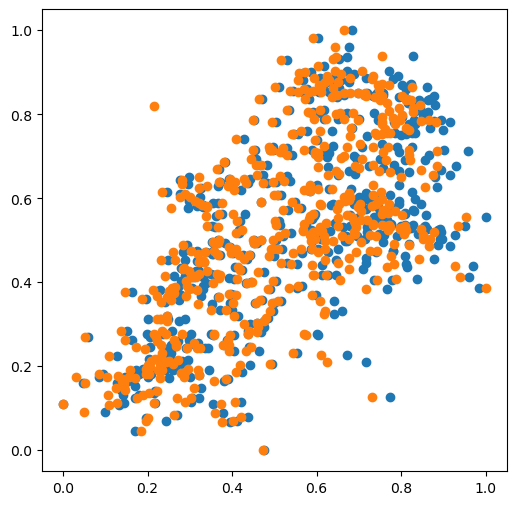

In [45]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

- We can observe a linear relation between cnt and temp, atemp features

In [46]:
# Dividing into X and y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
print(y_train.shape)
print(X_train.shape)

(511,)
(511, 29)


In [48]:
# Build model using RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

# Reduce the number of features impacting the least or not relevant to the model to 15 (Automatic elimination)
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [49]:
# Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_drizzle', True, 1),
 ('weathersit_mist', True, 1)]

In [50]:
# Function to build a model using statsmodel API - Takes the columns for which the model needs to be built for
def build_model(features):
    X_train_sm = sm.add_constant(X_train[features])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [51]:
# Function to calculate VIFs and print them - Takes the columns for which VIF to be calcualted as a parameter
def get_vif(features):
    df1 = X_train[features]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))

In [52]:
# Print Columns selected by RFE. 
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_sat', 'weathersit_drizzle',
       'weathersit_mist'],
      dtype='object')

In [53]:
# Print columns not selected by RFE. 
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

#### Model - 1: Initial model based on inputs from RFE

In [54]:
# Selected columns for Initial Model 1 - all columns selected by RFE
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.50e-191
Time:                        11:36:52   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2514      0

#### Algorithm to be followed for elimination of features:
- Check for a variable with high P-value(>0.05) and high VIF(>5),just drop it
- Check for a variable with high P-value(>0.05) and low VIF(<=5),drop only if there is no variable found matching above condition.
- Check for a variable with low P-value(<=0.05) and high VIF(>5), drop only if there is no variable found matching above condition.
- Variables with low P-value(<=0.05) and low VIF(<5), have them in the model and conclude it.

#### Model - 2

In [55]:
# P-value of all the existing variables are in range of <=0.05 and 'hum' variable has the highest VIF at this point.
# Dropping 'hum'(one feature at a time)

# Building Model-2 by removing 'hum' variable
features2 = ['yr', 'holiday', 'workingday', 'temp','windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_sat', 'weathersit_drizzle',
       'weathersit_mist']

build_model(features2)
get_vif(features2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          6.18e-189
Time:                        11:36:52   Log-Likelihood:                 511.07
No. Observations:                 511   AIC:                            -992.1
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1726      0

#### Model-3

In [56]:
# P-value of all the existing variables are in range of <=0.05 and 'temp' variable has the highest VIF at this point.
# But, 'temp' being the primary variable depicted the linear relationship. skipping this variable for now.
# Considering 'workingday' for now which has high VIF.

# Building Model-3 by removing 'workingday' variable
features3 = ['yr', 'holiday','temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_sat', 'weathersit_drizzle',
       'weathersit_mist']

build_model(features3)
get_vif(features3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.12e-186
Time:                        11:36:52   Log-Likelihood:                 502.93
No. Observations:                 511   AIC:                            -977.9
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2113      0

#### Model-4

In [57]:
# P-value of 'weekday_sat' variable is 0.08 which is > 0.05
# Dropping 'weekday_sat'

# Building Model-4 by removing 'weekday_sat' variable
features4 = ['yr', 'holiday','temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep','weathersit_drizzle',
       'weathersit_mist']

build_model(features4)
get_vif(features4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          3.46e-187
Time:                        11:36:52   Log-Likelihood:                 501.35
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2147      0

#### Below are the high level observations on the final model:
1. P-value: Most of the variables P-value are near 0 or acceptable range of under 0.05.
2. VIF: VIF value of all the variables are under 5 and 'temp' being the exception as it is the primary reason for linear relation.
3. R2 value is 0.84. Hence we consider this as Final model to use further

In [58]:
# Build final model with sklearn and columns with 'features4' list
lr = LinearRegression()
lr.fit(X_train[features4],y_train)
print(lr.intercept_,lr.coef_)

0.21466836478995854 [ 0.23481726 -0.09726248  0.47296795 -0.15478669 -0.0613866   0.04347883
  0.0770921  -0.0380958  -0.05059088  0.0761637  -0.28612357 -0.07975389]


### Residual analysis on the train data
- Find residuals
- Plot the residuals using distplot

In [59]:
# Predict the Train data
y_train_pred = lr.predict(X_train[features4])

In [60]:
# Plot a histogram of the error terms
def plot_err_terms(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

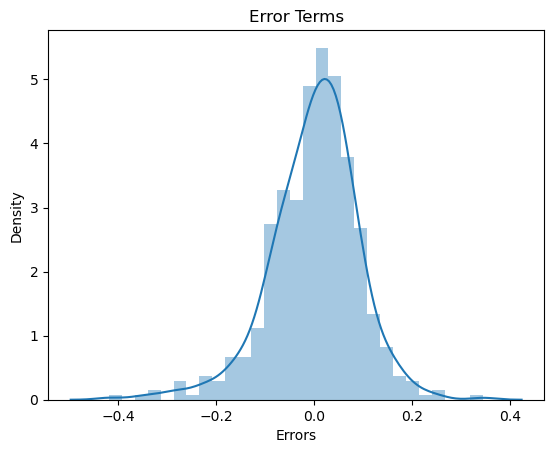

In [61]:
plot_err_terms(y_train, y_train_pred)

The plot suggests that the regression model is performing well. The errors are approximately normally distributed and show no significant patterns of heteroscedasticity. This indicates that the model's predictions are reliable and accurate.

In [62]:
# R2score value for Train data
r2_score(y_train,y_train_pred)

0.8367566547243688

### Prediction and Evaluation on the test set
- Scaling of the Test data: MinMaxScaling
- Add constants
- Drop variables that are dropped while building the model
- Predict the y values of the test data
- Evaluate the R2-score of the test data

In [63]:
# Feature scaling of the Test data: MinMaxScaling
# Test data to be transformed only, no fitting
df_test[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] = scaler.transform(df_test[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

In [64]:
# Dividing into X and y sets for the testing
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


In [66]:
# Predicting test data values
features4 = ['yr', 'holiday','temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep','weathersit_drizzle',
       'weathersit_mist']
y_test_pred = lr.predict(X_test[features4])

#### Evaluating the model

In [67]:
# Evaluate the R2-score of the test data
r2_score(y_test, y_test_pred)

0.8023908374348002

Text(0, 0.5, 'y_test_pred')

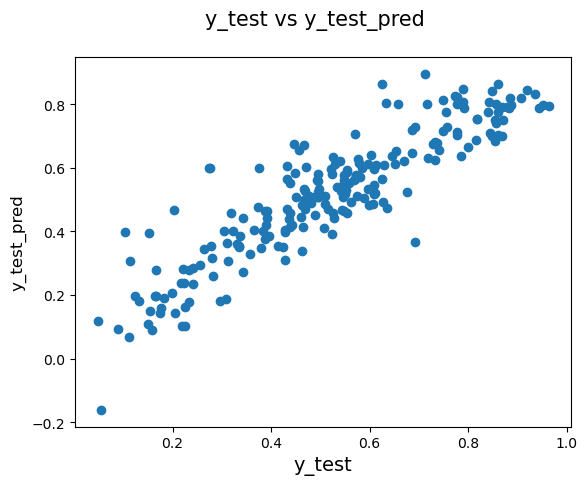

In [68]:
# Plotting scatter plot between y_test and y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12) 

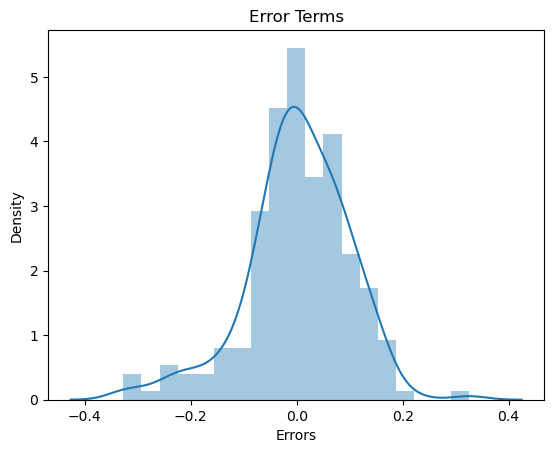

In [70]:
# Residual analysis of Test data
plot_err_terms(y_test, y_test_pred)

### Conclusions from above modelling:
#### Significant features:
1. Year
2. Weather day is a holiday or not
3. Temperature
4. Wind speed
5. Season type
6. Months(January, July, September)
7. Weather situation: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#### Comparison of R2 scores:
1. Train model R2 score is 0.8367
2. Test mode R2 score is   0.8023
3. Difference of 0.0344 is in acceptible range.

#### Residual analysis of Train and Test data
1. Both the plots are normally distributed
2. Both are centered around 0